In [1]:
#Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
import tree

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Read the .xlsx file as a Pandas dataframe
file = pd.ExcelFile('heart_disease.xlsx')
abr = pd.read_excel(file, 'Description')          # Coloumn headers abbreviation sheet
df = pd.read_excel(file, 'Heart_disease')         # Main dataframe sheet


In [3]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,Male,asymptomatic,125,0,False,normal,120,False,1.5,upsloping,reversable defect,4
904,62,Male,asymptomatic,166,170,False,st-t abnormality,120,True,3.0,flat,reversable defect,4
905,56,Male,non-anginal,170,0,False,lv hypertrophy,123,True,2.5,downsloping,normal,4
906,56,Male,non-anginal,144,208,True,st-t abnormality,105,TURE,NaN,downsloping,fixed defect,4


# **EDA**

In [4]:
df.shape

(908, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB


In [6]:
df['exang'].unique()

array([False, True, 'FALSE', 'TURE'], dtype=object)

In [7]:
df.isnull().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalch       0
exang        0
oldpeak     62
slope        0
thal         0
num          0
dtype: int64

In [8]:
for i in df.isna().sum():
  print((i/len(df))*100)

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
6.828193832599119
0.0
0.0
0.0


In [9]:
df.duplicated().sum()

1

In [10]:
df[df.duplicated()]

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
765,58,Male,non-anginal,150,219,False,st-t abnormality,118,True,0.0,downsloping,normal,2


In [11]:
df.drop_duplicates(inplace=True)

In [12]:
df.shape

(907, 13)

In [13]:
df.describe()

,age,trestbps,chol,thalch,oldpeak,num
count,907.000000,907.000000,907.000000,907.000000,845.000000,907.000000
mean,53.787211,133.412348,201.465270,135.976847,0.892308,1.007718
std,9.162016,20.405432,112.158285,26.813075,1.094092,1.144594
min,29.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.500000,120.000000,176.500000,118.000000,0.000000,0.000000
50%,54.000000,130.000000,224.000000,138.000000,0.500000,1.000000
75%,60.000000,144.000000,270.000000,156.000000,1.500000,2.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,4.000000


In [14]:
from sklearn.preprocessing import LabelEncoder

In [15]:
encode=LabelEncoder()

In [16]:
df['sex']=encode.fit_transform(df[['sex']])

In [17]:
df.head(2)

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,1,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,1,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0


In [18]:
df['cp']=encode.fit_transform(df[['cp']])

In [19]:
df['fbs']=encode.fit_transform(df[['fbs']])

In [20]:
df['restecg']=encode.fit_transform(df[['restecg']])

In [21]:
df['exang'].unique()

array([False, True, 'FALSE', 'TURE'], dtype=object)

In [22]:
df['exang'] = df['exang'].astype(str)
df['exang'] = encode.fit_transform(df[['exang']])

In [23]:
mapping = {'False':False, 'True':True, 'FALSE':False}
df['exang'] = df['exang'].map(mapping).fillna(df['exang'])
df['exang'].unique()

array([1, 3, 0, 2])

In [24]:
df['thal']=encode.fit_transform(df[['thal']])

In [25]:
df['slope']=encode.fit_transform(df[['slope']])

In [26]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,1,3,145,233,1,0,150,1,2.3,0,0,0
1,41,1,1,135,203,0,1,132,1,0.0,1,0,0
2,57,1,0,140,192,0,1,148,1,0.4,1,0,0
3,52,1,3,118,186,0,0,190,1,0.0,1,0,0
4,57,1,0,110,201,0,1,126,3,1.5,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,1,0,125,0,0,1,120,1,1.5,2,2,4
904,62,1,0,166,170,0,2,120,3,3.0,1,2,4
905,56,1,2,170,0,0,0,123,3,2.5,0,1,4
906,56,1,2,144,208,1,2,105,2,NaN,0,0,4


<Axes: >

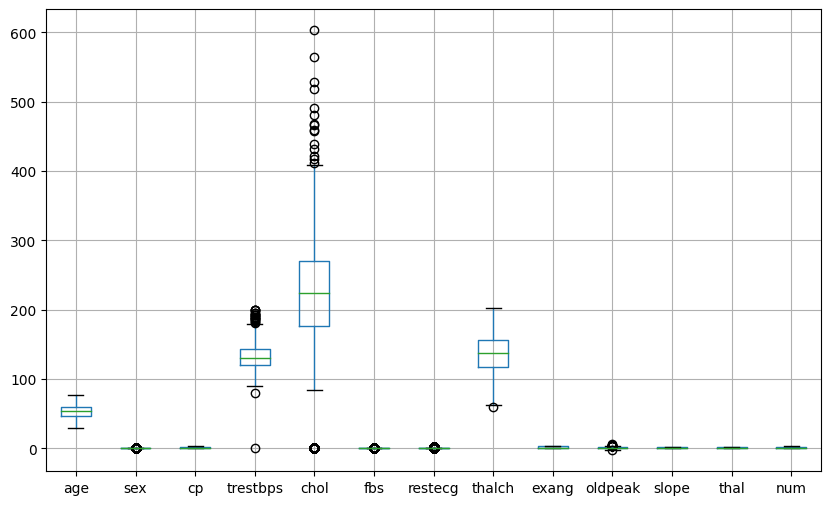

In [27]:
plt.figure(figsize=(10,6))
df.boxplot()

In [28]:
df.isnull().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalch       0
exang        0
oldpeak     62
slope        0
thal         0
num          0
dtype: int64

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 907 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       907 non-null    int64  
 1   sex       907 non-null    int64  
 2   cp        907 non-null    int64  
 3   trestbps  907 non-null    int64  
 4   chol      907 non-null    int64  
 5   fbs       907 non-null    int64  
 6   restecg   907 non-null    int64  
 7   thalch    907 non-null    int64  
 8   exang     907 non-null    int64  
 9   oldpeak   845 non-null    float64
 10  slope     907 non-null    int64  
 11  thal      907 non-null    int64  
 12  num       907 non-null    int64  
dtypes: float64(1), int64(12)
memory usage: 99.2 KB


In [88]:
df['oldpeak'].mean()

0.8654906284454245

In [90]:
df['oldpeak'].fillna(0.8 , inplace=True)

In [91]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
thal        0
num         0
dtype: int64

In [92]:
#target and feature column
x=df.iloc[ : ,:-1]
y=df.iloc[:,-1]

In [93]:
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal
0,63,1,3,145,233,1,0,150,1,2.3,0,0
1,41,1,1,135,203,0,1,132,1,0.0,1,0
2,57,1,0,140,192,0,1,148,1,0.4,1,0
3,52,1,3,118,186,0,0,190,1,0.0,1,0
4,57,1,0,110,201,0,1,126,3,1.5,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,1,0,125,0,0,1,120,1,1.5,2,2
904,62,1,0,166,170,0,2,120,3,3.0,1,2
905,56,1,2,170,0,0,0,123,3,2.5,0,1
906,56,1,2,144,208,1,2,105,2,0.5,0,0


In [94]:
y

0      0
1      0
2      0
3      0
4      0
      ..
903    4
904    4
905    4
906    4
907    4
Name: num, Length: 907, dtype: int64

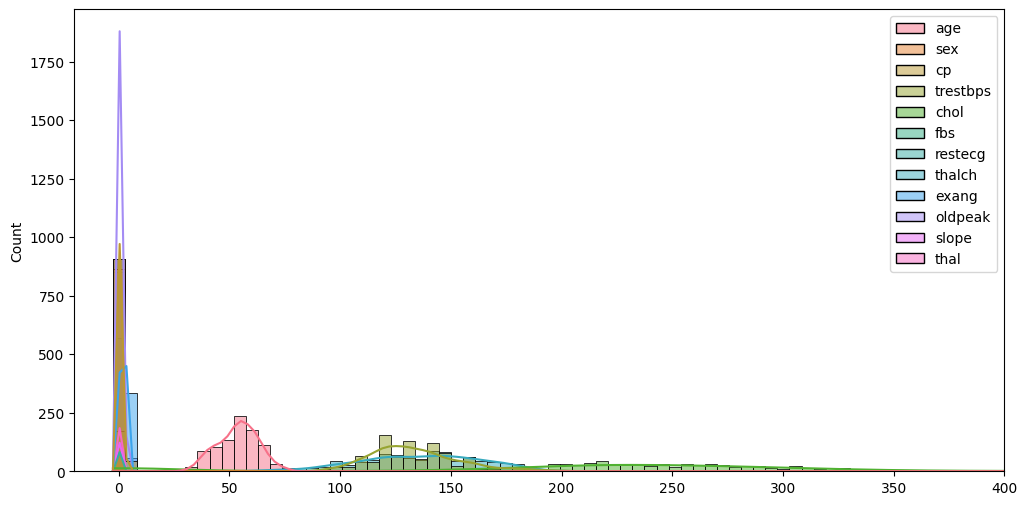

In [95]:
# Detection of outliers using visualization of distribution of features

plt.figure(figsize=(12,6))
sns.histplot(x, kde=True)
plt.xlim([-20, 400])
plt.show()

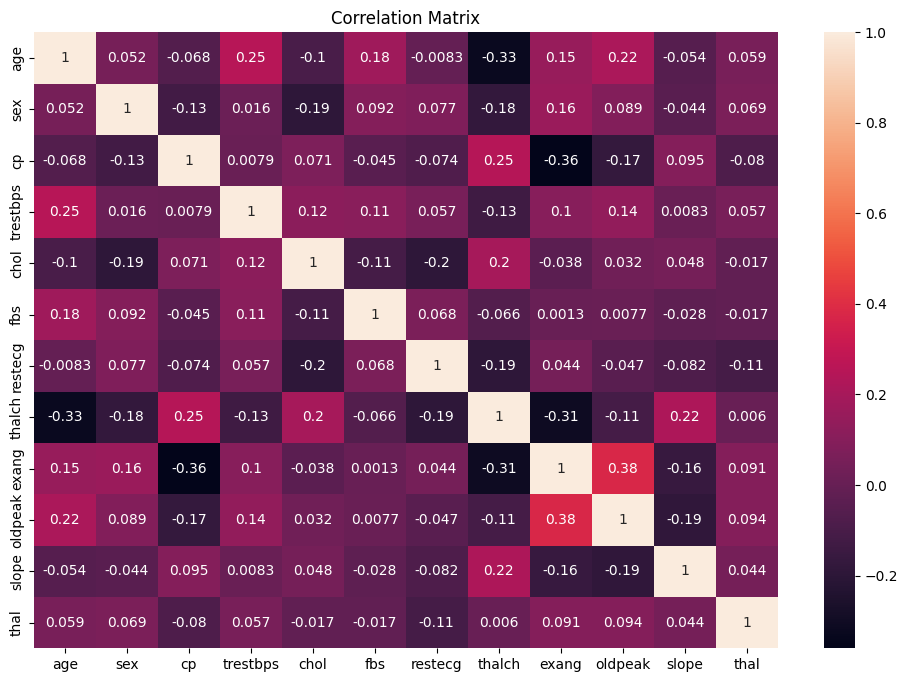

In [96]:
# Correlation matrices

corr = x.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True)
plt.title('Correlation Matrix')
plt.show()

# Split Data into train and test

In [99]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=9)

In [100]:
xtrain

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal
25,45,0,1,112,160,0,1,138,1,0.0,1,1
330,55,0,1,122,320,0,1,155,1,0.0,1,2
838,57,1,0,156,173,0,0,119,3,3.0,0,1
4,57,1,0,110,201,0,1,126,3,1.5,1,0
41,52,0,2,136,196,0,0,169,1,0.1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
56,60,0,2,120,178,1,1,96,1,0.0,2,1
501,53,1,2,160,0,0,0,122,3,0.0,2,2
638,38,1,0,120,282,0,1,170,1,0.0,1,2
348,40,1,2,130,281,0,1,167,1,0.0,2,0


In [101]:
ytrain

25     0
330    0
838    3
4      0
41     0
      ..
56     0
501    1
638    1
348    0
382    0
Name: num, Length: 725, dtype: int64

In [102]:
xtest

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal
718,61,1,0,148,203,0,1,161,1,0.0,2,2
213,42,1,2,120,228,0,1,152,3,1.5,1,0
415,38,0,0,110,0,0,1,156,1,0.0,1,1
614,63,1,0,96,305,0,2,121,3,1.0,2,0
159,56,1,3,120,193,0,0,162,1,1.9,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...
852,57,1,0,144,270,1,2,160,3,2.0,1,1
692,59,1,0,170,326,0,0,140,3,3.4,0,2
601,47,1,0,160,291,0,2,158,3,3.0,1,0
579,38,1,0,92,117,0,1,134,3,2.5,1,1


In [103]:
ytest

718    2
213    0
415    1
614    1
159    0
      ..
852    3
692    2
601    1
579    1
433    1
Name: num, Length: 182, dtype: int64

# Decision Tree Model

In [104]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier,plot_tree

In [105]:
dec_tree= DecisionTreeClassifier(criterion='gini',splitter='best',max_depth=3)
dec_tree


DecisionTreeClassifier(max_depth=3)

In [106]:
dec_tree.fit(xtrain,ytrain)

DecisionTreeClassifier(max_depth=3)

In [107]:
y_pred=dec_tree.predict(xtest)

In [108]:
from sklearn.metrics import accuracy_score,classification_report
accuracy_score(ytest,y_pred)

0.5439560439560439

In [109]:
# Classification report
print(classification_report(ytest, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.91      0.80        75
           1       0.36      0.65      0.47        48
           2       0.00      0.00      0.00        27
           3       0.00      0.00      0.00        26
           4       0.00      0.00      0.00         6

    accuracy                           0.54       182
   macro avg       0.21      0.31      0.25       182
weighted avg       0.39      0.54      0.45       182



In [110]:
pd.crosstab(ytest,y_pred)

col_0,0,1,3
num,,,
0,68,6,1
1,17,31,0
2,6,21,0
3,4,22,0
4,1,5,0


In [111]:
#accuracy
#numpy method
np.mean(y_pred==ytest)

0.5439560439560439

In [112]:
# ROC AUC score

from sklearn.metrics import roc_auc_score,precision_score,recall_score,f1_score

y_pred_proba = dec_tree.predict_proba(xtest)
y_pred_proba

array([[0.453125  , 0.3046875 , 0.109375  , 0.0859375 , 0.046875  ],
       [0.86407767, 0.10194175, 0.00485437, 0.01941748, 0.00970874],
       [0.08333333, 0.375     , 0.27083333, 0.20833333, 0.0625    ],
       [0.10447761, 0.32835821, 0.26865672, 0.2238806 , 0.07462687],
       [0.86407767, 0.10194175, 0.00485437, 0.01941748, 0.00970874],
       [0.08333333, 0.375     , 0.27083333, 0.20833333, 0.0625    ],
       [0.12837838, 0.56081081, 0.13513514, 0.15540541, 0.02027027],
       [0.25      , 0.34375   , 0.28125   , 0.09375   , 0.03125   ],
       [0.86407767, 0.10194175, 0.00485437, 0.01941748, 0.00970874],
       [0.10447761, 0.32835821, 0.26865672, 0.2238806 , 0.07462687],
       [0.86407767, 0.10194175, 0.00485437, 0.01941748, 0.00970874],
       [0.86407767, 0.10194175, 0.00485437, 0.01941748, 0.00970874],
       [0.12837838, 0.56081081, 0.13513514, 0.15540541, 0.02027027],
       [0.54945055, 0.24175824, 0.06593407, 0.12087912, 0.02197802],
       [0.25      , 0.34375   , 0.

In [113]:
roc_auc_score(ytest,y_pred_proba,multi_class="ovr")

0.7961447874792051

In [114]:
precision = precision_score(ytest, y_pred, average='weighted')
recall = recall_score(ytest, y_pred, average='weighted')
f1 = f1_score(ytest, y_pred, average='weighted')


In [115]:
precision

0.3880817711700064

In [116]:
recall

0.5439560439560439

In [117]:
f1

0.4506871574540748

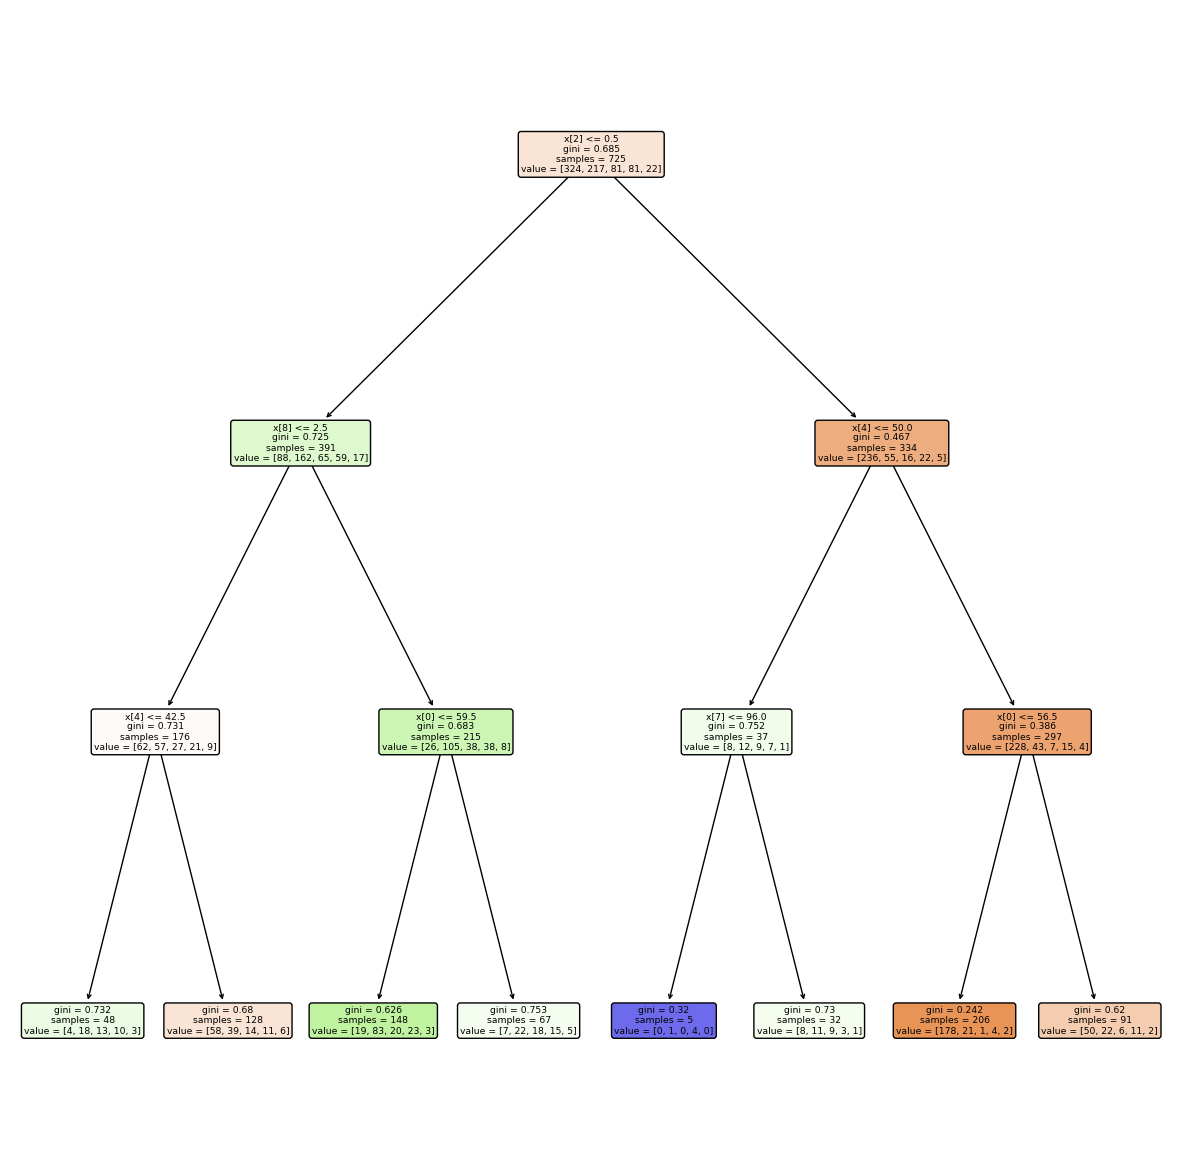

In [118]:
plt.figure(figsize=(15,15))
plot_tree(dec_tree,filled=True,rounded=True);

# HyperParameter Tunning

In [119]:
from sklearn.model_selection import GridSearchCV
params= {'criterion':['gini','entropy'],'splitter':['best','random'],'max_depth':[1,2,3,4,5]}

grid_search= GridSearchCV(dec_tree,params,verbose=2)

In [120]:
grid_search

GridSearchCV(estimator=DecisionTreeClassifier(max_depth=3),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'splitter': ['best', 'random']},
             verbose=2)

In [121]:

grid_search.fit(xtrain,ytrain)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END .........criterion=gini, max_depth=1, splitter=best; total time=   0.0s
[CV] END .........criterion=gini, max_depth=1, splitter=best; total time=   0.0s
[CV] END .........criterion=gini, max_depth=1, splitter=best; total time=   0.0s
[CV] END .........criterion=gini, max_depth=1, splitter=best; total time=   0.0s
[CV] END .........criterion=gini, max_depth=1, splitter=best; total time=   0.0s
[CV] END .......criterion=gini, max_depth=1, splitter=random; total time=   0.0s
[CV] END .......criterion=gini, max_depth=1, splitter=random; total time=   0.0s
[CV] END .......criterion=gini, max_depth=1, splitter=random; total time=   0.0s
[CV] END .......criterion=gini, max_depth=1, splitter=random; total time=   0.0s
[CV] END .......criterion=gini, max_depth=1, splitter=random; total time=   0.0s
[CV] END .........criterion=gini, max_depth=2, splitter=best; total time=   0.0s
[CV] END .........criterion=gini, max_depth=2, 

GridSearchCV(estimator=DecisionTreeClassifier(max_depth=3),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'splitter': ['best', 'random']},
             verbose=2)

In [122]:
grid_search.best_params_


{'criterion': 'entropy', 'max_depth': 3, 'splitter': 'random'}

In [123]:
final_model= DecisionTreeClassifier(criterion='entropy',splitter='random',max_depth=3)

In [124]:
final_model

DecisionTreeClassifier(criterion='entropy', max_depth=3, splitter='random')

In [125]:
# Get the best model
best_model = grid_search.best_estimator_

In [126]:
accuracy = accuracy_score(ytest, y_pred)

In [127]:
accuracy

0.5439560439560439

# Interview Question

2. What is the difference between the Label encoding and One-hot encoding?
Ans:Label Encoding vs. One-Hot Encoding:
Label Encoding: Assigns a numeric code to each unique categorical value based on alphabetical order. Useful when categories have inherent order or rank.
One-Hot Encoding: Creates new binary variables (dummy variables) for each category. Each column represents a unique category, and values are 0 or 1. Preferred when there’s no inherent order among categories.